#Load libraries

In [ ]:
#we import the necessary libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

#Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X= pd.read_csv('/content/drive/My Drive/TFM_DF/dt_c3_2_cat1_sin_outliers.csv', index_col=0)
X

,purchase_id,"q_Aceite, vinagre y sal",q_Aceitunas y encurtidos,q_Acondicionador y mascarilla,q_Afeitado y cuidado para hombre,q_Agua,q_Alimentación infantil,q_Arreglos,q_Arroz,q_Arroz y pasta,q_Atún y otras conservas de pescado,q_Aves y jamón cocido,q_Aves y pollo,q_Azúcar y edulcorante,q_Bacón y salchichas,q_Bases de maquillaje y corrector,q_Berberechos y mejillones,"q_Biberón, chupete y menaje",q_Bollería de horno,q_Bollería envasada,q_Bífidus,q_Cacao soluble y chocolate a la taza,q_Café cápsula y monodosis,q_Café molido y en grano,q_Café soluble y otras bebidas,q_Carne,q_Carne congelada,q_Cerdo,q_Cereales,q_Cerveza,q_Cerveza sin alcohol,q_Champú,q_Chicles y caramelos,q_Chocolate,q_Chopped y mortadela,q_Coloración cabello,q_Colorete y polvos,q_Conejo y cordero,q_Conservas de verdura y frutas,q_Cuidado corporal,...,percp_Sidra y cava,percp_Sopa y caldo,percp_Sushi,percp_Tartas y churros,percp_Tartas y pasteles,percp_Tinto de verano y sangría,percp_Toallitas y pañales,percp_Tomate,percp_Tomate y otros sabores,percp_Tortitas,percp_Turrones,percp_Té e infusiones,percp_Tónica y bitter,percp_Utensilios de limpieza y calzado,percp_Vacuno,percp_Velas y decoración,percp_Verdura,percp_Vino blanco,percp_Vino lambrusco y espumoso,percp_Vino rosado,percp_Vino tinto,percp_Yogures desnatados,percp_Yogures griegos,percp_Yogures líquidos,percp_Yogures naturales y sabores,percp_Yogures y postres infantiles,count_creation_card,count_card_update,count_card_country,Spain,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
564,53326,2,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,256.92,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,50.99,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,1,1,1,1,1201.0,20.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
1056,54662,3,0,0,0,1,0,1,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,377.91,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,28.49,0.00,0.0,0.0,0.0,45.93,0.00,0.0,0.00,0.0,1,1,1,1,170997.0,2849.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
1058,54664,3,0,0,0,1,0,1,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,382.35,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,28.82,0.00,0.0,0.0,0.0,46.47,0.00,0.0,0.00,0.0,1,1,1,1,171199.0,2853.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1581,55924,6,0,6,6,14,0,0,12,0,0,6,14,2,0,0,0,0,0,0,4,6,6,0,8,0,2,0,0,0,0,0,6,18,0,2,0,0,0,2,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,76.67,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2,2,2,0,-99950.0,-1666.0,1,2018,8,1,q3,Summer,39362777.0,656046.0
1586,55938,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,27.41,0.00,0.0,0.0,0.0,0.00,65.48,0.0,0.00,0.0,1,1,1,1,354946.0,5915.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,5316196,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,36.86,0.0,0.0,0.00,0.0,0.0,0.0,0.0,16.03,96.15,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,1,1,1,1,1163254.0,19387.0,1,2020,5,0,q2,Spring,0.0,0.0
524376,5316215,0,12,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,27.11,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,117.47,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2,2,1,1,61621138.0,1027018.0,0,2020,5,1,q2,Spring,45258918.0,754315.0
524377,5316223,0,0,0,0,5,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00

In [ ]:
#number of rows and columns
X.shape

(524380, 929)

In [ ]:
X=X.drop(columns= ['purchase_id', 'Spain'])
X

,"q_Aceite, vinagre y sal",q_Aceitunas y encurtidos,q_Acondicionador y mascarilla,q_Afeitado y cuidado para hombre,q_Agua,q_Alimentación infantil,q_Arreglos,q_Arroz,q_Arroz y pasta,q_Atún y otras conservas de pescado,q_Aves y jamón cocido,q_Aves y pollo,q_Azúcar y edulcorante,q_Bacón y salchichas,q_Bases de maquillaje y corrector,q_Berberechos y mejillones,"q_Biberón, chupete y menaje",q_Bollería de horno,q_Bollería envasada,q_Bífidus,q_Cacao soluble y chocolate a la taza,q_Café cápsula y monodosis,q_Café molido y en grano,q_Café soluble y otras bebidas,q_Carne,q_Carne congelada,q_Cerdo,q_Cereales,q_Cerveza,q_Cerveza sin alcohol,q_Champú,q_Chicles y caramelos,q_Chocolate,q_Chopped y mortadela,q_Coloración cabello,q_Colorete y polvos,q_Conejo y cordero,q_Conservas de verdura y frutas,q_Cuidado corporal,q_Cuidado e higiene facial,...,percp_Salazones y ahumados,percp_Sidra y cava,percp_Sopa y caldo,percp_Sushi,percp_Tartas y churros,percp_Tartas y pasteles,percp_Tinto de verano y sangría,percp_Toallitas y pañales,percp_Tomate,percp_Tomate y otros sabores,percp_Tortitas,percp_Turrones,percp_Té e infusiones,percp_Tónica y bitter,percp_Utensilios de limpieza y calzado,percp_Vacuno,percp_Velas y decoración,percp_Verdura,percp_Vino blanco,percp_Vino lambrusco y espumoso,percp_Vino rosado,percp_Vino tinto,percp_Yogures desnatados,percp_Yogures griegos,percp_Yogures líquidos,percp_Yogures naturales y sabores,percp_Yogures y postres infantiles,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
564,2,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,256.92,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,50.99,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,1,1,1,1201.0,20.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
1056,3,0,0,0,1,0,1,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,377.91,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,28.49,0.00,0.0,0.0,0.0,45.93,0.00,0.0,0.00,0.0,1,1,1,170997.0,2849.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
1058,3,0,0,0,1,0,1,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,382.35,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,28.82,0.00,0.0,0.0,0.0,46.47,0.00,0.0,0.00,0.0,1,1,1,171199.0,2853.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1581,6,0,6,6,14,0,0,12,0,0,6,14,2,0,0,0,0,0,0,4,6,6,0,8,0,2,0,0,0,0,0,6,18,0,2,0,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,76.67,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2,2,2,-99950.0,-1666.0,1,2018,8,1,q3,Summer,39362777.0,656046.0
1586,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,27.41,0.00,0.0,0.0,0.0,0.00,65.48,0.0,0.00,0.0,1,1,1,354946.0,5915.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,36.86,0.0,0.0,0.00,0.0,0.0,0.0,0.0,16.03,96.15,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,1,1,1,1163254.0,19387.0,1,2020,5,0,q2,Spring,0.0,0.0
524376,0,12,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,27.11,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,117.47,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2,2,1,61621138.0,1027018.0,0,2020,5,1,q2,Spring,45258918.0,754315.0
524377,0,0,0,0,5,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0

In [ ]:
f= X[X['Class']==1]
f

,"q_Aceite, vinagre y sal",q_Aceitunas y encurtidos,q_Acondicionador y mascarilla,q_Afeitado y cuidado para hombre,q_Agua,q_Alimentación infantil,q_Arreglos,q_Arroz,q_Arroz y pasta,q_Atún y otras conservas de pescado,q_Aves y jamón cocido,q_Aves y pollo,q_Azúcar y edulcorante,q_Bacón y salchichas,q_Bases de maquillaje y corrector,q_Berberechos y mejillones,"q_Biberón, chupete y menaje",q_Bollería de horno,q_Bollería envasada,q_Bífidus,q_Cacao soluble y chocolate a la taza,q_Café cápsula y monodosis,q_Café molido y en grano,q_Café soluble y otras bebidas,q_Carne,q_Carne congelada,q_Cerdo,q_Cereales,q_Cerveza,q_Cerveza sin alcohol,q_Champú,q_Chicles y caramelos,q_Chocolate,q_Chopped y mortadela,q_Coloración cabello,q_Colorete y polvos,q_Conejo y cordero,q_Conservas de verdura y frutas,q_Cuidado corporal,q_Cuidado e higiene facial,...,percp_Salazones y ahumados,percp_Sidra y cava,percp_Sopa y caldo,percp_Sushi,percp_Tartas y churros,percp_Tartas y pasteles,percp_Tinto de verano y sangría,percp_Toallitas y pañales,percp_Tomate,percp_Tomate y otros sabores,percp_Tortitas,percp_Turrones,percp_Té e infusiones,percp_Tónica y bitter,percp_Utensilios de limpieza y calzado,percp_Vacuno,percp_Velas y decoración,percp_Verdura,percp_Vino blanco,percp_Vino lambrusco y espumoso,percp_Vino rosado,percp_Vino tinto,percp_Yogures desnatados,percp_Yogures griegos,percp_Yogures líquidos,percp_Yogures naturales y sabores,percp_Yogures y postres infantiles,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
564,2,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,256.92,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,50.99,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,1,1,1201.0,20.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
1056,3,0,0,0,1,0,1,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,1,0,...,0.0,0.0,0.00,0.0,0.00,377.91,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,28.49,0.0,0.0,0.0,0.0,45.93,0.00,0.00,0.00,0.0,1,1,1,170997.0,2849.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
1058,3,0,0,0,1,0,1,0,0,0,1,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,1,0,...,0.0,0.0,0.00,0.0,0.00,382.35,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,28.82,0.0,0.0,0.0,0.0,46.47,0.00,0.00,0.00,0.0,1,1,1,171199.0,2853.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1581,6,0,6,6,14,0,0,12,0,0,6,14,2,0,0,0,0,0,0,4,6,6,0,8,0,2,0,0,0,0,0,6,18,0,2,0,0,0,2,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,76.67,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2,2,2,-99950.0,-1666.0,1,2018,8,1,q3,Summer,39362777.0,656046.0
1586,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,27.41,0.0,0.0,0.0,0.0,0.00,65.48,0.00,0.00,0.0,1,1,1,354946.0,5915.0,1,2018,8,0,q3,Summer,39817351.0,663622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522703,0,0,0,0,16,0,40,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,4,4,4,6530678.0,108844.0,0,2020,5,1,q2,Spring,0.0,0.0
522705,0,0,0,0,0,0,60,30,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,6,6,3,8310146.0,138502.0,0,2020,5,1,q2,Spring,871242.0,14520.0
522707,0,0,0,0,6,0,30,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0.00,0

In [ ]:
fraction_of_rows_f = f.sample(frac=0.3)
fraction_of_rows_f

,"q_Aceite, vinagre y sal",q_Aceitunas y encurtidos,q_Acondicionador y mascarilla,q_Afeitado y cuidado para hombre,q_Agua,q_Alimentación infantil,q_Arreglos,q_Arroz,q_Arroz y pasta,q_Atún y otras conservas de pescado,q_Aves y jamón cocido,q_Aves y pollo,q_Azúcar y edulcorante,q_Bacón y salchichas,q_Bases de maquillaje y corrector,q_Berberechos y mejillones,"q_Biberón, chupete y menaje",q_Bollería de horno,q_Bollería envasada,q_Bífidus,q_Cacao soluble y chocolate a la taza,q_Café cápsula y monodosis,q_Café molido y en grano,q_Café soluble y otras bebidas,q_Carne,q_Carne congelada,q_Cerdo,q_Cereales,q_Cerveza,q_Cerveza sin alcohol,q_Champú,q_Chicles y caramelos,q_Chocolate,q_Chopped y mortadela,q_Coloración cabello,q_Colorete y polvos,q_Conejo y cordero,q_Conservas de verdura y frutas,q_Cuidado corporal,q_Cuidado e higiene facial,...,percp_Salazones y ahumados,percp_Sidra y cava,percp_Sopa y caldo,percp_Sushi,percp_Tartas y churros,percp_Tartas y pasteles,percp_Tinto de verano y sangría,percp_Toallitas y pañales,percp_Tomate,percp_Tomate y otros sabores,percp_Tortitas,percp_Turrones,percp_Té e infusiones,percp_Tónica y bitter,percp_Utensilios de limpieza y calzado,percp_Vacuno,percp_Velas y decoración,percp_Verdura,percp_Vino blanco,percp_Vino lambrusco y espumoso,percp_Vino rosado,percp_Vino tinto,percp_Yogures desnatados,percp_Yogures griegos,percp_Yogures líquidos,percp_Yogures naturales y sabores,percp_Yogures y postres infantiles,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
349786,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,1,1,-137.0,-3.0,1,2019,12,1,q4,Winter,0.0,0.0
425910,65,39,0,0,130,52,0,65,0,52,0,0,13,0,0,0,0,0,0,0,0,0,26,0,0,0,0,39,0,0,78,0,0,0,0,0,0,26,0,0,...,0.0,0.00,1294.12,0.0,0.0,0.0,0.0,1647.06,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,676.47,0.00,0.0,0.0,0.00,0.0,935.29,0.00,1064.71,0.00,13,13,8,582767.0,9712.0,1,2020,2,1,q1,Winter,0.0,0.0
263004,0,0,6,6,0,0,2,16,2,2,2,8,2,12,0,0,0,8,12,20,0,0,0,0,2,0,14,8,0,0,4,0,8,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,52.67,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,2,2,2,29532.0,492.0,1,2019,10,1,q4,Autumn,1209923.0,20165.0
304058,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,129.76,0.00,0.00,0.00,2,2,1,-127081.0,-2119.0,1,2019,11,0,q4,Autumn,0.0,0.0
407241,4,0,1,2,6,0,1,0,0,0,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,101.22,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,1,1,-4478.0,-75.0,1,2020,1,1,q1,Winter,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,9,0,3,0,3,3,0,0,0,3,6,9,3,0,0,0,0,0,6,0,0,0,0,0,0,0,6,0,0,0,6,0,3,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,140.00,0.0,0.0,0.0,0.0,201.82,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,234.55,0.00,0.00,3,3,2,-42917739.0,-715296.0,1,2018,9,1,q3,Autumn,0.0,0.0
510159,6,2,0,0,0,0,2,0,10,2,14,18,2,4,0,0,0,0,10,0,0,0,0,2,0,2,14,2,0,0,0,4,8,0,0,0,0,2,0,0,...,0.0,0.00,202.06,0.0,0.0,0.0,0.0,247.42,0.00,60.82,0.0,0.0,0.0,0.0,304.12,507.22,124.74,159.79,97.94,0.0,0.0,97.94,0.0,0.00,0.00,0.00,132.99,2,2,1,3608431.0,60140.0,1,2020,4,1,q2,Spring,4065204.0,67753.0
167657,20,15,0,0,40,0,0,0,0,25,15,15,10,30,0,0,0,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0

In [ ]:
nf= X[X['Class']==0]
nf

,"q_Aceite, vinagre y sal",q_Aceitunas y encurtidos,q_Acondicionador y mascarilla,q_Afeitado y cuidado para hombre,q_Agua,q_Alimentación infantil,q_Arreglos,q_Arroz,q_Arroz y pasta,q_Atún y otras conservas de pescado,q_Aves y jamón cocido,q_Aves y pollo,q_Azúcar y edulcorante,q_Bacón y salchichas,q_Bases de maquillaje y corrector,q_Berberechos y mejillones,"q_Biberón, chupete y menaje",q_Bollería de horno,q_Bollería envasada,q_Bífidus,q_Cacao soluble y chocolate a la taza,q_Café cápsula y monodosis,q_Café molido y en grano,q_Café soluble y otras bebidas,q_Carne,q_Carne congelada,q_Cerdo,q_Cereales,q_Cerveza,q_Cerveza sin alcohol,q_Champú,q_Chicles y caramelos,q_Chocolate,q_Chopped y mortadela,q_Coloración cabello,q_Colorete y polvos,q_Conejo y cordero,q_Conservas de verdura y frutas,q_Cuidado corporal,q_Cuidado e higiene facial,...,percp_Salazones y ahumados,percp_Sidra y cava,percp_Sopa y caldo,percp_Sushi,percp_Tartas y churros,percp_Tartas y pasteles,percp_Tinto de verano y sangría,percp_Toallitas y pañales,percp_Tomate,percp_Tomate y otros sabores,percp_Tortitas,percp_Turrones,percp_Té e infusiones,percp_Tónica y bitter,percp_Utensilios de limpieza y calzado,percp_Vacuno,percp_Velas y decoración,percp_Verdura,percp_Vino blanco,percp_Vino lambrusco y espumoso,percp_Vino rosado,percp_Vino tinto,percp_Yogures desnatados,percp_Yogures griegos,percp_Yogures líquidos,percp_Yogures naturales y sabores,percp_Yogures y postres infantiles,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,106.59,0.00,0.00,0.0,0.0,0.0,0.0,62.02,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,115.89,0.00,0.0,1,1,1,-167.0,-3.0,1,2018,8,1,q3,Summer,39926283.0,665438.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1,1,1,5312975.0,88549.0,0,2018,8,0,q3,Summer,45239259.0,753987.0
2,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,176.15,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,113.55,0.0,0.0,188.35,0.0,0.0,0.00,39.02,0.0,1,1,1,-2095.0,-35.0,1,2018,8,0,q3,Summer,39924075.0,665401.0
3,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,5,5,1,582890.0,9714.0,1,2018,8,0,q3,Summer,40508964.0,675149.0
4,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,2,2,1,3074318.0,51238.0,1,2018,8,1,q3,Summer,43000277.0,716671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,36.86,0.0,0.0,0.0,0.0,0.00,0.0,0.0,16.03,96.15,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1,1,1,1163254.0,19387.0,1,2020,5,0,q2,Spring,0.0,0.0
524376,0,12,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,27.11,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,117.47,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,2,2,1,61621138.0,1027018.0,0,2020,5,1,q2,Spring,45258918.0,754315.0
524377,0,0,0,0,5,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0

In [ ]:
fraction_of_rows_nf = nf.sample(frac=0.3)
fraction_of_rows_nf

,"q_Aceite, vinagre y sal",q_Aceitunas y encurtidos,q_Acondicionador y mascarilla,q_Afeitado y cuidado para hombre,q_Agua,q_Alimentación infantil,q_Arreglos,q_Arroz,q_Arroz y pasta,q_Atún y otras conservas de pescado,q_Aves y jamón cocido,q_Aves y pollo,q_Azúcar y edulcorante,q_Bacón y salchichas,q_Bases de maquillaje y corrector,q_Berberechos y mejillones,"q_Biberón, chupete y menaje",q_Bollería de horno,q_Bollería envasada,q_Bífidus,q_Cacao soluble y chocolate a la taza,q_Café cápsula y monodosis,q_Café molido y en grano,q_Café soluble y otras bebidas,q_Carne,q_Carne congelada,q_Cerdo,q_Cereales,q_Cerveza,q_Cerveza sin alcohol,q_Champú,q_Chicles y caramelos,q_Chocolate,q_Chopped y mortadela,q_Coloración cabello,q_Colorete y polvos,q_Conejo y cordero,q_Conservas de verdura y frutas,q_Cuidado corporal,q_Cuidado e higiene facial,...,percp_Salazones y ahumados,percp_Sidra y cava,percp_Sopa y caldo,percp_Sushi,percp_Tartas y churros,percp_Tartas y pasteles,percp_Tinto de verano y sangría,percp_Toallitas y pañales,percp_Tomate,percp_Tomate y otros sabores,percp_Tortitas,percp_Turrones,percp_Té e infusiones,percp_Tónica y bitter,percp_Utensilios de limpieza y calzado,percp_Vacuno,percp_Velas y decoración,percp_Verdura,percp_Vino blanco,percp_Vino lambrusco y espumoso,percp_Vino rosado,percp_Vino tinto,percp_Yogures desnatados,percp_Yogures griegos,percp_Yogures líquidos,percp_Yogures naturales y sabores,percp_Yogures y postres infantiles,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
457448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,20.28,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,11577105.0,192951.0,0,2020,3,0,q1,Spring,818556.0,13642.0
519349,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,52.60,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1230209.0,20503.0,1,2020,5,0,q2,Spring,0.0,0.0
312951,128,0,0,0,0,0,0,0,0,0,0,0,20,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,1,43918129.0,731968.0,0,2019,11,1,q4,Autumn,42173095.0,702884.0
426190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,234.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,46307418.0,771790.0,0,2020,2,0,q1,Winter,37221887.0,620364.0
454238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,39.02,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,52971733.0,882862.0,0,2020,3,0,q1,Spring,42258964.0,704316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446612,0,0,0,0,10,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,76.51,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1,-5998697.0,-99979.0,1,2020,3,1,q1,Spring,0.0,0.0
342764,2,8,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.94,0.0,0.0,0.0,0.0,206.78,0.0,0.0,0.0,11.30,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1206937.0,20115.0,1,2019,12,1,q4,Winter,0.0,0.0
78008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0

In [ ]:
X2= fraction_of_rows_f.append(fraction_of_rows_nf)
X2

,"q_Aceite, vinagre y sal",q_Aceitunas y encurtidos,q_Acondicionador y mascarilla,q_Afeitado y cuidado para hombre,q_Agua,q_Alimentación infantil,q_Arreglos,q_Arroz,q_Arroz y pasta,q_Atún y otras conservas de pescado,q_Aves y jamón cocido,q_Aves y pollo,q_Azúcar y edulcorante,q_Bacón y salchichas,q_Bases de maquillaje y corrector,q_Berberechos y mejillones,"q_Biberón, chupete y menaje",q_Bollería de horno,q_Bollería envasada,q_Bífidus,q_Cacao soluble y chocolate a la taza,q_Café cápsula y monodosis,q_Café molido y en grano,q_Café soluble y otras bebidas,q_Carne,q_Carne congelada,q_Cerdo,q_Cereales,q_Cerveza,q_Cerveza sin alcohol,q_Champú,q_Chicles y caramelos,q_Chocolate,q_Chopped y mortadela,q_Coloración cabello,q_Colorete y polvos,q_Conejo y cordero,q_Conservas de verdura y frutas,q_Cuidado corporal,q_Cuidado e higiene facial,...,percp_Salazones y ahumados,percp_Sidra y cava,percp_Sopa y caldo,percp_Sushi,percp_Tartas y churros,percp_Tartas y pasteles,percp_Tinto de verano y sangría,percp_Toallitas y pañales,percp_Tomate,percp_Tomate y otros sabores,percp_Tortitas,percp_Turrones,percp_Té e infusiones,percp_Tónica y bitter,percp_Utensilios de limpieza y calzado,percp_Vacuno,percp_Velas y decoración,percp_Verdura,percp_Vino blanco,percp_Vino lambrusco y espumoso,percp_Vino rosado,percp_Vino tinto,percp_Yogures desnatados,percp_Yogures griegos,percp_Yogures líquidos,percp_Yogures naturales y sabores,percp_Yogures y postres infantiles,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
349786,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,1,1,-137.0,-3.0,1,2019,12,1,q4,Winter,0.0,0.0
425910,65,39,0,0,130,52,0,65,0,52,0,0,13,0,0,0,0,0,0,0,0,0,26,0,0,0,0,39,0,0,78,0,0,0,0,0,0,26,0,0,...,0.0,0.0,1294.12,0.0,0.0,0.0,0.0,1647.06,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,676.47,0.0,0.0,0.0,0.0,0.0,935.29,0.0,1064.71,0.0,13,13,8,582767.0,9712.0,1,2020,2,1,q1,Winter,0.0,0.0
263004,0,0,6,6,0,0,2,16,2,2,2,8,2,12,0,0,0,8,12,20,0,0,0,0,2,0,14,8,0,0,4,0,8,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,52.67,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,2,2,2,29532.0,492.0,1,2019,10,1,q4,Autumn,1209923.0,20165.0
304058,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,129.76,0.0,0.00,0.0,2,2,1,-127081.0,-2119.0,1,2019,11,0,q4,Autumn,0.0,0.0
407241,4,0,1,2,6,0,1,0,0,0,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,101.22,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,1,1,-4478.0,-75.0,1,2020,1,1,q1,Winter,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446612,0,0,0,0,10,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,76.51,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,2,2,1,-5998697.0,-99979.0,1,2020,3,1,q1,Spring,0.0,0.0
342764,2,8,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,42.94,0.0,0.0,0.0,0.0,206.78,0.0,0.0,0.0,11.30,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,1,1,1206937.0,20115.0,1,2019,12,1,q4,Winter,0.0,0.0
78008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0

#PRE-PROCESADO

### One-Hot Encoding

Utilizaremos la técnica de one-hot encoding.

<img src="figures/oh.png" width="50%">


Seleccionemos las variables categóricas en primer lugar.

In [ ]:
#Mostramos todas las columnas para identificar las categoricas
cols = X2.columns.tolist()
cols

['q_Aceite, vinagre y sal',
 'q_Aceitunas y encurtidos',
 'q_Acondicionador y mascarilla',
 'q_Afeitado y cuidado para hombre',
 'q_Agua',
 'q_Alimentación infantil',
 'q_Arreglos',
 'q_Arroz',
 'q_Arroz y pasta',
 'q_Atún y otras conservas de pescado',
 'q_Aves y jamón cocido',
 'q_Aves y pollo',
 'q_Azúcar y edulcorante',
 'q_Bacón y salchichas',
 'q_Bases de maquillaje y corrector',
 'q_Berberechos y mejillones',
 'q_Biberón, chupete y menaje',
 'q_Bollería de horno',
 'q_Bollería envasada',
 'q_Bífidus',
 'q_Cacao soluble y chocolate a la taza',
 'q_Café cápsula y monodosis',
 'q_Café molido y en grano',
 'q_Café soluble y otras bebidas',
 'q_Carne',
 'q_Carne congelada',
 'q_Cerdo',
 'q_Cereales',
 'q_Cerveza',
 'q_Cerveza sin alcohol',
 'q_Champú',
 'q_Chicles y caramelos',
 'q_Chocolate',
 'q_Chopped y mortadela',
 'q_Coloración cabello',
 'q_Colorete y polvos',
 'q_Conejo y cordero',
 'q_Conservas de verdura y frutas',
 'q_Cuidado corporal',
 'q_Cuidado e higiene facial',
 'q_D

In [ ]:
#Convert categorical vars that are int to object
X2[['year','month']]= X2[['year','month']].astype(str)
X2.select_dtypes('object')

,client_type,Alpha-3 code,year,month,quarter,season
349786,WEB,BEL,2019,12,q4,Winter
425910,AND,CRI,2020,2,q1,Winter
263004,AND,SGP,2019,10,q4,Autumn
304058,AND,ESP,2019,11,q4,Autumn
407241,WEB,TUR,2020,1,q1,Winter
...,...,...,...,...,...,...
446612,WEB,ESP,2020,3,q1,Spring
342764,AND,ESP,2019,12,q4,Winter
78008,IOS,ESP,2019,4,q2,Spring
155828,WEB,ESP,2019,7,q3,Summer


In [ ]:
categorical_vars = set(['Alpha-3 code','client_type', 'year','month', 'quarter', 'season' ])
numerical_vars = set(X2.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [ ]:
print(categorical_vars)
print(numerical_vars)

['season', 'month', 'quarter', 'year', 'Alpha-3 code', 'client_type']
['perc_Salazones y ahumados', 'perc_Pez y otros', 'perc_Vacuno', 'i_Sopa y caldo', 'perc_Gato', 'q_Embutido', 'q_Fruta variada', 'i_Embutido curado', 'percq_Té e infusiones', 'perc_Arroz y pasta', 'p_Papel higiénico y celulosa', 'percq_Refresco de cola', 'percp_Yogures desnatados', 'perc_Gazpacho y cremas', 'i_Higiene y cuidado', 'q_Aves y jamón cocido', 'p_Yogures desnatados', 'p_Aceitunas y encurtidos', 'p_Café soluble y otras bebidas', 'q_Fijación cabello', 'p_Bollería de horno', 'p_Embutido', 'i_Pescado congelado', 'p_Refresco de té y sin gas', 'i_Gelatina y otros postres', 'i_Melocotón y piña', 'p_Chopped y mortadela', 'count_creation_card', 'i_Bollería de horno', 'i_Desodorante', 'q_Colorete y polvos', 'perc_Refresco de naranja y de limón', 'p_Limpieza baño y WC', 'p_Bífidus', 'q_Helados', 'q_Labios', 'percq_Limpieza cocina', 'percq_Refresco de naranja y de limón', 'percp_Arroz', 'q_Cerveza sin alcohol', 'q_Yog

In [ ]:
ohe = OneHotEncoder(sparse = False)
ohe_fit = ohe.fit(X2[categorical_vars])
X_ohe = pd.DataFrame(ohe.fit_transform(X2[categorical_vars]))
X_ohe.columns = pd.DataFrame(ohe_fit.get_feature_names())

In [ ]:
X2[categorical_vars].head()

,season,month,quarter,year,Alpha-3 code,client_type
349786,Winter,12,q4,2019,BEL,WEB
425910,Winter,2,q1,2020,CRI,AND
263004,Autumn,10,q4,2019,SGP,AND
304058,Autumn,11,q4,2019,ESP,AND
407241,Winter,1,q1,2020,TUR,WEB


In [ ]:
X_ohe

,"(x0_Autumn,)","(x0_Spring,)","(x0_Summer,)","(x0_Winter,)","(x1_1,)","(x1_10,)","(x1_11,)","(x1_12,)","(x1_2,)","(x1_3,)","(x1_4,)","(x1_5,)","(x1_6,)","(x1_7,)","(x1_8,)","(x1_9,)","(x2_q1,)","(x2_q2,)","(x2_q3,)","(x2_q4,)","(x3_2018,)","(x3_2019,)","(x3_2020,)","(x4_AND,)","(x4_ARE,)","(x4_ARG,)","(x4_AUS,)","(x4_AUT,)","(x4_BEL,)","(x4_BGR,)","(x4_BLR,)","(x4_BOL,)","(x4_BRA,)","(x4_CAN,)","(x4_CHE,)","(x4_CHL,)","(x4_CHN,)","(x4_CMR,)","(x4_COL,)","(x4_CRI,)",...,"(x4_LTU,)","(x4_LUX,)","(x4_LVA,)","(x4_MAR,)","(x4_MDA,)","(x4_MEX,)","(x4_MKD,)","(x4_MLT,)","(x4_MNG,)","(x4_MOZ,)","(x4_MUS,)","(x4_MYS,)","(x4_NLD,)","(x4_NOR,)","(x4_PAN,)","(x4_PER,)","(x4_PHL,)","(x4_POL,)","(x4_PRI,)","(x4_PRT,)","(x4_PRY,)","(x4_QAT,)","(x4_ROU,)","(x4_RUS,)","(x4_SAU,)","(x4_SGP,)","(x4_SLV,)","(x4_SRB,)","(x4_SVN,)","(x4_SWE,)","(x4_TUR,)","(x4_TWN,)","(x4_UKR,)","(x4_URY,)","(x4_USA,)","(x4_VNM,)","(x4_ZAF,)","(x5_AND,)","(x5_IOS,)","(x5_WEB,)"
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157310,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157312,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0

In [ ]:
X2 = pd.concat((X_ohe, X2[numerical_vars].reset_index()), axis=1)
X2

,"(x0_Autumn,)","(x0_Spring,)","(x0_Summer,)","(x0_Winter,)","(x1_1,)","(x1_10,)","(x1_11,)","(x1_12,)","(x1_2,)","(x1_3,)","(x1_4,)","(x1_5,)","(x1_6,)","(x1_7,)","(x1_8,)","(x1_9,)","(x2_q1,)","(x2_q2,)","(x2_q3,)","(x2_q4,)","(x3_2018,)","(x3_2019,)","(x3_2020,)","(x4_AND,)","(x4_ARE,)","(x4_ARG,)","(x4_AUS,)","(x4_AUT,)","(x4_BEL,)","(x4_BGR,)","(x4_BLR,)","(x4_BOL,)","(x4_BRA,)","(x4_CAN,)","(x4_CHE,)","(x4_CHL,)","(x4_CHN,)","(x4_CMR,)","(x4_COL,)","(x4_CRI,)",...,perc_Perro,i_Pescado en bandeja,percp_Cuidado e higiene facial,p_Insecticida y ambientador,q_Gato,i_Berberechos y mejillones,p_Queso untable y fresco,perc_Limpiahogar y friegasuelos,percp_Utensilios de limpieza y calzado,percp_Embutido curado,p_Especias,p_Mantequilla y margarina,i_Higiene íntima,i_Verdura,q_Coloración cabello,percq_Yogures desnatados,q_Platos preparados fríos,i_Bacón y salchichas,q_Cerdo,i_Cacao soluble y chocolate a la taza,percq_Higiene y cuidado,i_Refresco de cola,q_Cuidado e higiene facial,perc_Pasta y fideos,percq_Embutido,q_Pan de molde y otras especialidades,q_Champú,q_Hamburguesas y picadas,percq_Flan y natillas,"perc_Mayonesa, ketchup y mostaza",q_Golosinas,perc_Toallitas y pañales,percp_Fitoterapia,percq_Empanados y elaborados,i_Atún y otras conservas de pescado,perc_Chopped y mortadela,i_Queso untable y fresco,percq_Otras salsas,perc_Azúcar y edulcorante,p_Cereales
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0,0,0.00,0,0.0,0.0,0.00,0,0.00,0.00,0,0,0,0.0,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.0,0.0,0.00,0,0.0,1.0,27.08,0.0,0.0,0.00,0.00,0.0,14.95,0,0.0,0,0.00,0,0.0,0.0,0.00,0,26.26,0.00,0,78,0,0.0,7.75,0,38.29,0.0,0.00,182.0,0.0,26.0,3.03,6.84,1.70
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,1.73,2,0.0,0.0,0.00,0.0,0.0,0.95,0.00,0.0,12.36,0,0.0,2,18.40,14,0.0,0.0,7.04,0,0.00,1.31,2,4,2,0.0,0.40,0,0.00,0.0,0.00,7.0,0.0,0.0,1.31,0.67,1.92
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.91,0.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0,0,0.00,0,0.0,0.0,3.02,0,0.00,0.00,0,0,0,0.0,0.00,0,0.00,0.0,6.67,0.0,0.0,0.0,3.33,0.00,2.17
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,1.90,0,0.0,0.0,0.00,0.0,0.0,0.00,1.65,0.0,19.88,0,0.0,0,9.12,0,0.0,0.0,0.00,0,0.00,0.00,0,1,2,0.0,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,3.28,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,22.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,25.76,0,0.0,0,7.72,0,0.0,0.0,0.00,0,0.00,0.00,4,0,0,0.0,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00
157310,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,22.54,0,0.0,0,2.91,0,0.0,0.0,0.00,0,0.00,0.00,0,0,0,0.0,0.00,0,0.00,0.0,0.00,10.7,0.0,0.0,2.70,0.00,0.

In [ ]:
X2= X2.drop(columns= 'index')
X2

,"(x0_Autumn,)","(x0_Spring,)","(x0_Summer,)","(x0_Winter,)","(x1_1,)","(x1_10,)","(x1_11,)","(x1_12,)","(x1_2,)","(x1_3,)","(x1_4,)","(x1_5,)","(x1_6,)","(x1_7,)","(x1_8,)","(x1_9,)","(x2_q1,)","(x2_q2,)","(x2_q3,)","(x2_q4,)","(x3_2018,)","(x3_2019,)","(x3_2020,)","(x4_AND,)","(x4_ARE,)","(x4_ARG,)","(x4_AUS,)","(x4_AUT,)","(x4_BEL,)","(x4_BGR,)","(x4_BLR,)","(x4_BOL,)","(x4_BRA,)","(x4_CAN,)","(x4_CHE,)","(x4_CHL,)","(x4_CHN,)","(x4_CMR,)","(x4_COL,)","(x4_CRI,)",...,perc_Perro,i_Pescado en bandeja,percp_Cuidado e higiene facial,p_Insecticida y ambientador,q_Gato,i_Berberechos y mejillones,p_Queso untable y fresco,perc_Limpiahogar y friegasuelos,percp_Utensilios de limpieza y calzado,percp_Embutido curado,p_Especias,p_Mantequilla y margarina,i_Higiene íntima,i_Verdura,q_Coloración cabello,percq_Yogures desnatados,q_Platos preparados fríos,i_Bacón y salchichas,q_Cerdo,i_Cacao soluble y chocolate a la taza,percq_Higiene y cuidado,i_Refresco de cola,q_Cuidado e higiene facial,perc_Pasta y fideos,percq_Embutido,q_Pan de molde y otras especialidades,q_Champú,q_Hamburguesas y picadas,percq_Flan y natillas,"perc_Mayonesa, ketchup y mostaza",q_Golosinas,perc_Toallitas y pañales,percp_Fitoterapia,percq_Empanados y elaborados,i_Atún y otras conservas de pescado,perc_Chopped y mortadela,i_Queso untable y fresco,percq_Otras salsas,perc_Azúcar y edulcorante,p_Cereales
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0,0,0.00,0,0.0,0.0,0.00,0,0.00,0.00,0,0,0,0.0,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.0,0.0,0.00,0,0.0,1.0,27.08,0.0,0.0,0.00,0.00,0.0,14.95,0,0.0,0,0.00,0,0.0,0.0,0.00,0,26.26,0.00,0,78,0,0.0,7.75,0,38.29,0.0,0.00,182.0,0.0,26.0,3.03,6.84,1.70
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,1.73,2,0.0,0.0,0.00,0.0,0.0,0.95,0.00,0.0,12.36,0,0.0,2,18.40,14,0.0,0.0,7.04,0,0.00,1.31,2,4,2,0.0,0.40,0,0.00,0.0,0.00,7.0,0.0,0.0,1.31,0.67,1.92
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.91,0.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0,0,0.00,0,0.0,0.0,3.02,0,0.00,0.00,0,0,0,0.0,0.00,0,0.00,0.0,6.67,0.0,0.0,0.0,3.33,0.00,2.17
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,1.90,0,0.0,0.0,0.00,0.0,0.0,0.00,1.65,0.0,19.88,0,0.0,0,9.12,0,0.0,0.0,0.00,0,0.00,0.00,0,1,2,0.0,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,3.28,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,22.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,25.76,0,0.0,0,7.72,0,0.0,0.0,0.00,0,0.00,0.00,4,0,0,0.0,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00
157310,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,22.54,0,0.0,0,2.91,0,0.0,0.0,0.00,0,0.00,0.00,0,0,0,0.0,0.00,0,0.00,0.0,0.00,10.7,0.0,0.0,2.70,0.00,0.

### Normalizar

Ahora vamos a normalizar los datos, es decir, llevarlos a media 0 y desviación estándar 1.

In [ ]:
y = X2['Class']
del X2['Class']

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
#we also as a standard measure normalize the dataset
X_scale = pd.DataFrame(scale(X2))
X_scale.columns = X2.columns
X2 = X_scale
X2.columns = X_scale.columns
X2

,"(x0_Autumn,)","(x0_Spring,)","(x0_Summer,)","(x0_Winter,)","(x1_1,)","(x1_10,)","(x1_11,)","(x1_12,)","(x1_2,)","(x1_3,)","(x1_4,)","(x1_5,)","(x1_6,)","(x1_7,)","(x1_8,)","(x1_9,)","(x2_q1,)","(x2_q2,)","(x2_q3,)","(x2_q4,)","(x3_2018,)","(x3_2019,)","(x3_2020,)","(x4_AND,)","(x4_ARE,)","(x4_ARG,)","(x4_AUS,)","(x4_AUT,)","(x4_BEL,)","(x4_BGR,)","(x4_BLR,)","(x4_BOL,)","(x4_BRA,)","(x4_CAN,)","(x4_CHE,)","(x4_CHL,)","(x4_CHN,)","(x4_CMR,)","(x4_COL,)","(x4_CRI,)",...,perc_Perro,i_Pescado en bandeja,percp_Cuidado e higiene facial,p_Insecticida y ambientador,q_Gato,i_Berberechos y mejillones,p_Queso untable y fresco,perc_Limpiahogar y friegasuelos,percp_Utensilios de limpieza y calzado,percp_Embutido curado,p_Especias,p_Mantequilla y margarina,i_Higiene íntima,i_Verdura,q_Coloración cabello,percq_Yogures desnatados,q_Platos preparados fríos,i_Bacón y salchichas,q_Cerdo,i_Cacao soluble y chocolate a la taza,percq_Higiene y cuidado,i_Refresco de cola,q_Cuidado e higiene facial,perc_Pasta y fideos,percq_Embutido,q_Pan de molde y otras especialidades,q_Champú,q_Hamburguesas y picadas,percq_Flan y natillas,"perc_Mayonesa, ketchup y mostaza",q_Golosinas,perc_Toallitas y pañales,percp_Fitoterapia,percq_Empanados y elaborados,i_Atún y otras conservas de pescado,perc_Chopped y mortadela,i_Queso untable y fresco,percq_Otras salsas,perc_Azúcar y edulcorante,p_Cereales
0,-0.606597,-0.570994,-0.454776,1.478876,-0.401053,-0.321439,-0.348443,2.816957,-0.259943,-0.350093,-0.278389,-0.263148,-0.21907,-0.248940,-0.268466,-0.268126,-0.671901,-0.472456,-0.488492,1.478658,-0.255512,0.752858,-0.655385,-0.017287,-0.011827,-0.025221,-0.016146,-0.009091,93.480836,-0.004367,-0.004367,-0.005638,-0.028869,-0.012353,-0.01937,-0.062083,-0.028312,-0.002521,-0.01747,-0.010697,...,-0.061443,-0.094259,-0.079337,-0.151322,-0.043643,-0.084574,-0.209818,-0.089840,-0.080804,-0.142994,-0.149489,-0.215956,-0.076606,-0.254334,-0.054206,-0.089055,-0.080139,-0.061836,-0.117302,-0.087824,-0.057583,-0.168412,-0.054346,-0.102541,-0.124447,-0.070150,-0.060990,-0.183812,-0.088098,-0.079569,-0.030005,-0.111354,-0.053203,-0.076620,-0.124361,-0.052366,-0.058134,-0.221798,-0.086660,-0.231102
1,-0.606597,-0.570994,-0.454776,1.478876,-0.401053,-0.321439,-0.348443,-0.354993,3.846991,-0.350093,-0.278389,-0.263148,-0.21907,-0.248940,-0.268466,-0.268126,1.488315,-0.472456,-0.488492,-0.676289,-0.255512,-1.328273,1.525821,-0.017287,-0.011827,-0.025221,-0.016146,-0.009091,-0.010697,-0.004367,-0.004367,-0.005638,-0.028869,-0.012353,-0.01937,-0.062083,-0.028312,-0.002521,-0.01747,93.480836,...,-0.061443,-0.094259,-0.079337,-0.151322,-0.043643,-0.084574,2.475395,16.253684,-0.080804,-0.142994,-0.149489,-0.215956,-0.076606,0.705785,-0.054206,-0.089055,-0.080139,-0.061836,-0.117302,-0.087824,-0.057583,-0.168412,-0.054346,9.574617,-0.124447,-0.070150,78.764838,-0.183812,-0.088098,7.180952,-0.030005,5.811062,-0.053203,-0.076620,18.611494,-0.052366,3.518875,0.225002,2.639709,3.518384
2,1.648541,-0.570994,-0.454776,-0.676189,-0.401053,3.111011,-0.348443,-0.354993,-0.259943,-0.350093,-0.278389,-0.263148,-0.21907,-0.248940,-0.268466,-0.268126,-0.671901,-0.472456,-0.488492,1.478658,-0.255512,0.752858,-0.655385,-0.017287,-0.011827,-0.025221,-0.016146,-0.009091,-0.010697,-0.004367,-0.004367,-0.005638,-0.028869,-0.012353,-0.01937,-0.062083,-0.028312,-0.002521,-0.01747,-0.010697,...,-0.061443,-0.094259,-0.079337,5.206235,0.189310,-0.084574,-0.209818,-0.089840,-0.080804,-0.142994,3.562656,-0.215956,-0.076606,0.539450,-0.054206,-0.089055,1.174042,2.749181,5.274117,-0.087824,-0.057583,0.235065,-0.054346,-0.102541,0.528109,0.366522,3.981361,0.624545,-0.088098,0.295167,-0.030005,-0.111354,-0.053203,-0.076620,0.596248,-0.052366,-0.058134,-0.028627,0.180396,4.003611
3,1.648541,-0.570994,-0.454776,-0.676189,-0.401053,-0.321439,2.869909,-0.354993,-0.259943,-0.350093,-0.278389,-0.263148,-0.21907,-0.248940,-0.268466,-0.268126,-0.671901,-0.472456,-0.488492,1.478658,-0.255512,0.752858,-0.655385,-0.017287,-0.011827,

### Split en Train/Validación/Test

Utilizaremos a modo de ejemplo los ratios habitualmente recomendados:

• Train: 70%.

• Validación: 15%.

• Test: 15%.


In [ ]:
perc_values = [0.7, 0.15, 0.15];

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_rand, X_valtest_rand, y_train_rand, y_valtest_rand = train_test_split(X2, y, test_size=perc_values[1] + perc_values[2], random_state=1);

X_val_rand, X_test_rand, y_val_rand, y_test_rand = train_test_split(X_valtest_rand, y_valtest_rand, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

Visualizamos el tamaño de los 3 subdatasets

In [ ]:
print('Train data size = ' + str(X_train_rand.shape))
print('Train target size = ' + str(y_train_rand.shape))
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Train data size = (110119, 1032)
Train target size = (110119,)
Validation data size = (23597, 1032)
Validation target size = (23597,)
Test data size = (23598, 1032)
Test target size = (23598,)


#Logistic Regression

1) Importar modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

2) Importar métrica

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score as auc

3) Definir el método.

Vamos a entrenar un modelo con algunos parámetros eligidos al azar.

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear', random_state=1)

4) Llamar al método fit para entrenar el modelo

In [ ]:
LR.fit(X_train_rand,y_train_rand)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

5) Llamar al método predict para generar las predicciones.

In [ ]:
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

# Combinar train y validación
X_test_rand = pd.concat((X_val_rand,X_test_rand), axis = 0)
y_test_rand = np.concatenate((y_val_rand, y_test_rand), axis = 0)

del X_val_rand, y_val_rand

print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Validation data size = (23597, 1032)
Validation target size = (23597,)
Test data size = (23598, 1032)
Test target size = (23598,)
Test data size = (47195, 1032)
Test target size = (47195,)


In [ ]:
pred_train_p = LR.predict(X_train_rand)
pred_test_p = LR.predict(X_test_rand)

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [ ]:
# Calcular métricas de evaluación
auc_train = auc(y_train_rand, pred_train_p);
auc_test = auc(y_test_rand, pred_test_p);
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['RandomForest (Default)'],'auc_train':[auc_train],'auc_test':[auc_test]}, columns=['model','auc_train', 'auc_test']), ignore_index=True)

In [ ]:
results

,model,auc_train,auc_test
0,RandomForest (Default),0.904461,0.859627


In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
cm= confusion_matrix(y_test_rand, pred_test_p)
cm

array([[46884,    22],
       [   81,   208]])

In [ ]:
# get importance
importance = LR.coef_[0]

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score

Feature: 0, Score: 0.00809
Feature: 1, Score: -0.02534
Feature: 2, Score: -0.00526
Feature: 3, Score: 0.02006
Feature: 4, Score: 0.00729
Feature: 5, Score: 0.00014
Feature: 6, Score: -0.00420
Feature: 7, Score: -0.00262
Feature: 8, Score: 0.03126
Feature: 9, Score: -0.00408
Feature: 10, Score: -0.02340
Feature: 11, Score: -0.01461
Feature: 12, Score: 0.01405
Feature: 13, Score: -0.01030
Feature: 14, Score: -0.01000
Feature: 15, Score: 0.01940
Feature: 16, Score: 0.01914
Feature: 17, Score: -0.01736
Feature: 18, Score: -0.00017
Feature: 19, Score: -0.00450
Feature: 20, Score: -0.02700
Feature: 21, Score: 0.01174
Feature: 22, Score: 0.00182
Feature: 23, Score: -0.01857
Feature: 24, Score: -0.00358
Feature: 25, Score: -0.02141
Feature: 26, Score: -0.01464
Feature: 27, Score: -0.00441
Feature: 28, Score: 0.01956
Feature: 29, Score: 0.00425
Feature: 30, Score: -0.00649
Feature: 31, Score: 0.00795
Feature: 32, Score: 0.05106
Feature: 33, Score: -0.01316
Feature: 34, Score: 0.01538
Feature: 3

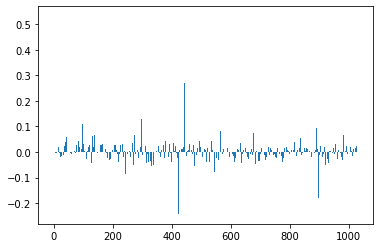

In [ ]:
# get importance
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()